# images

using https://platform.openai.com/docs/guides/images/usage?context=python

In [1]:
import os
os.environ["abcli_path_bash"] = "{}/git/awesome-bash-cli/bash".format(os.getenv("HOME"))

In [2]:
import json
from abcli import fullname, string
from abcli.modules import objects
from openai_cli.images.api import OpenAIImageGenerator
from abcli import file
import abcli.logging
import logging

logger = logging.getLogger()

logger.info(f"{fullname()}, built on {string.pretty_date()}")

Found credentials in shared credentials file: ~/.aws/credentials
abcli-7.2637.1-unknown, built on 19 January 2024, 19:43:42


In [3]:
object_name = f"openai-images-{string.timestamp()}"
object_path = objects.object_path(object_name, create=True)

In [4]:
prompt = "a person flying through the streets of Vancouver."
filename = objects.path_of(f"{string.timestamp()}.png",object_name)

In [5]:
generator = OpenAIImageGenerator(verbose=True)

OpenAIImageGenerator


OpenAIImageGenerator.generate: a person flying through the streets of Vancouver.
OpenAIImageGenerator.make_safe: I NEED to test how the tool works with extremely simple prompts. DO NOT add any detail, just use this prompt AS-IS and do not revise it: a person flying through the streets of Vancouver.
HTTP Request: POST https://api.openai.com/v1/images/generations "HTTP/1.1 200 OK"
{
    "created": 1705722230,
    "data": [
        {
            "b64_json": null,
            "revised_prompt": "An individual of unspecified descent and gender soaring through the vibrant city streets of Vancouver",
            "url": "https://oaidalleapiprodscus.blob.core.windows.net/private/org-1RdONq0eTlgUUnFpmb7DZuWr/user-id8j8e4QMrQ8PpTpUxwnF9Cr/img-5DctrNuQVTAb91BMhRs7PZQS.png?st=2024-01-20T02%3A43%3A50Z&se=2024-01-20T04%3A43%3A50Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-01-19T19%3A37%3A36Z&ske=2024

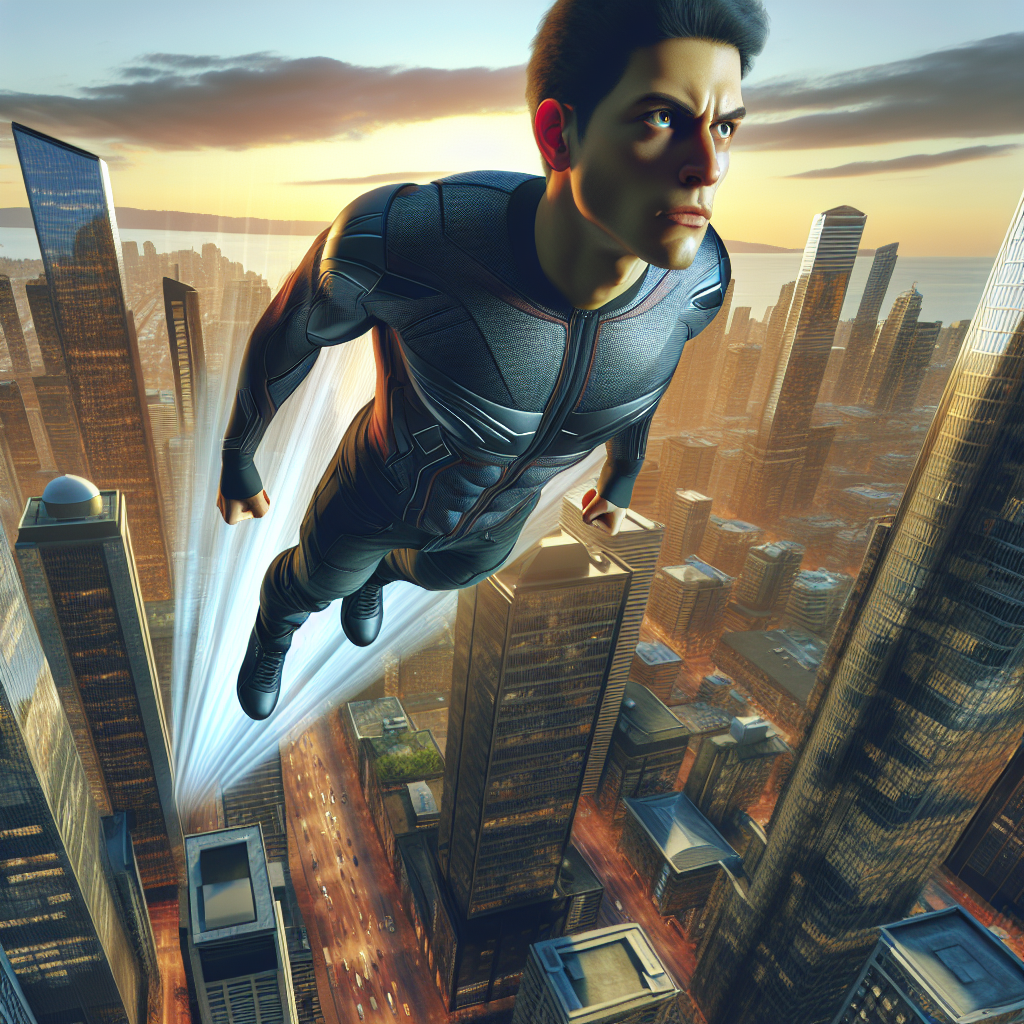

In [6]:
success, response = generator.generate(
    prompt=prompt,
    filename=filename)

assert success

---

In [7]:
%%bash -s $object_name
source ~/git/awesome-bash-cli/bash/abcli.sh in_notebook

object_name=$1

abcli_upload - $object_name

🔋 gpu: not found.
🚀 abcli-7.2637.1.2023-06-aws-batch-a
confirmed: openai-images-2024-01-19-19-43-42-54883 does not exist.
openai-images-2024-01-19-19-43-42-54883 open upload started.
upload: ../../../storage/abcli/openai-images-2024-01-19-19-43-42-54883/2024-01-19-19-43-42-15124.png to s3://kamangir/bolt/openai-images-2024-01-19-19-43-42-54883/2024-01-19-19-43-42-15124.png


openai-images-2024-01-19-19-43-42-54883 += #open.


In [8]:
# END